<a href="https://colab.research.google.com/github/tleitchColumbia/week7/blob/main/APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

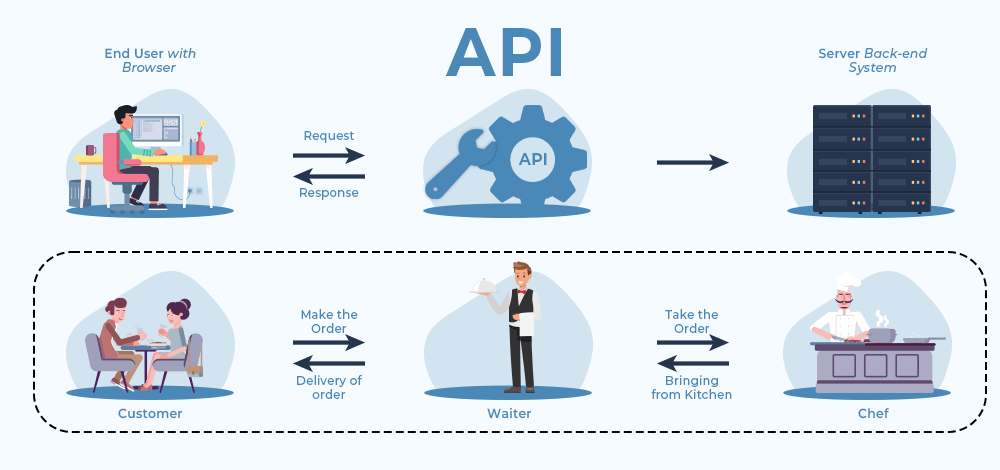

# Lesson 1: Open AI API - GPT

In [ ]:
pip install openai

In [ ]:
import openai

In [ ]:
API_KEY = 'ENTER YOUR API KEY HERE'

https://platform.openai.com/docs/quickstart/add-your-api-key


In [ ]:
openai.api_key = API_KEY

In [ ]:
model = 'gpt-3.5-turbo-instruct'

https://platform.openai.com/docs/models/gpt-3


In [ ]:
response = openai.Completion.create(
    prompt = 'How big is the moon',
    model = model

)

https://platform.openai.com/docs/api-reference/completions/create





In [ ]:
print(response)

In [ ]:
response['choices'][0]['text']

In [ ]:
for result in response.choices:
  print(result.text)

# Lesson 2: Open AI - Dalle-2

In [ ]:
prompt = ""

In [ ]:
response_img = openai.Image.create(
  prompt = prompt,
  n=1,
  size="256x256"
)
image_url = response_img['data'][0]['url']

In [ ]:
import requests

img_data = requests.get(image_url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

# Lesson 3: GMail

To use gmail below, the password and fromaddr must come from your account.<br>
The password is an App Password from your google account.<br>
Here are instructions to set up that passord:<br>
https://support.google.com/accounts/answer/185833?hl=en

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

def send_email(toaddr, subject, body, img_path = None):
    password = ""
    fromaddr = "abc123@gmail.com"

    msg = MIMEMultipart()
    msg['From'] = fromaddr
    msg['To'] = toaddr
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    # Attach the image data to the email
    if img_path is not None:
      # Open an image file in binary mode
      with open(img_path, 'rb') as f:
          # Create a MIMEImage object
          img = MIMEImage(f.read())
      msg.attach(img)

    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login(fromaddr, password)
    text = msg.as_string()
    server.sendmail(fromaddr, toaddr, text)
    server.quit()


# Lesson 4: SMS w/ Twilio

[Twilio](https://www.twilio.com/en-us)<br>
[Twilio Emulator](https://console.twilio.com/us1/develop/sms/try-it-out/send-an-sms)

In [ ]:
pip install twilio

In [ ]:
from twilio.rest import Client

# Your Twilio account SID and auth token
account_sid = ''
auth_token = ''

# Create a Twilio client
client = Client(account_sid, auth_token)

# The phone numbers
from_number = '+12223334444'  # Your Twilio phone number
recipients = ['+12223334444', '+12223334444', '+12223334444']

# The message content
message_body = result_sms

# Send SMS to multiple recipients
for recipient in recipients:
  # Send the SMS message
  message = client.messages.create(
      body=message_body,
      from_=from_number,
      to=recipient
  )
  print(f"Message SID: {message.sid}")

# Lesson 5: YouTube Channel Data

In [ ]:
API_Key = 'ENTER YOUR API KEY HERE'

In [ ]:
MyChannelDictionary = {
        'channelID_FinEd2' : 'UCCmJVw9xQfYuuAAwZGedKRg',
        'channelID_MeetKevin' : 'UCUvvj5lwue7PspotMDjk5UA',
        'channelID_FinEd1' : 'UCnMn36GT_H0X-w5_ckLtlgQ',
        'channelID_ziptrader' : 'UC0BGhWsIbV7Dm-lsvhdlMbA',
    }

In [ ]:
# Build the YouTube API service
from googleapiclient.discovery import build
service = build('youtube', 'v3', developerKey = API_Key)

In [ ]:
# Set inputs
CHANNEL_NAME = 'channelID_ziptrader'
MAX_RESULTS = 5000

In [ ]:
# Process inputs
CHANNEL_ID = MyChannelDictionary[CHANNEL_NAME]

In [ ]:
# Run a single query for id's
response = service.search().list(
    part='id,snippet',
    channelId=CHANNEL_ID,
    type='video',
    maxResults = MAX_RESULTS
).execute()

In [ ]:
# Run follow up queries in loop

responslist = [response]

nextPageToken = response['nextPageToken']

i = 1
while isinstance(nextPageToken,type('str')):

    response = service.search().list(
        part='id,snippet',
        channelId=CHANNEL_ID,
        type='video',
        maxResults = MAX_RESULTS,
        pageToken= nextPageToken
    ).execute()

    responslist.append(response)

    nextPageToken = response.get('nextPageToken')

    print(i)
    i+=1


1
2
3
4
5
6
7
8
9
10


In [ ]:
# Print data to view first 10 downloads
for d in responslist[0]['items'][:10]:
    print(f"https://www.youtube.com/watch?v={d['id']['videoId']}",
    d['id']['videoId'],
    d['snippet']['publishedAt'],
    d['snippet']['title'])

https://www.youtube.com/watch?v=nKz6Ql33zFk nKz6Ql33zFk 2022-10-06T01:02:37Z UNITED NATIONS: “PREPARE TO LOSE EVERYTHING!”
https://www.youtube.com/watch?v=pC0yetSG6kU pC0yetSG6kU 2021-03-13T00:08:14Z ARK JUST BET BIG ON THIS [Cathie Wood]
https://www.youtube.com/watch?v=msseS6Jo4NM msseS6Jo4NM 2023-02-10T01:01:15Z TOP 6 AI STOCKS TO BUY
https://www.youtube.com/watch?v=LfaNlm1_vU0 LfaNlm1_vU0 2021-10-30T22:23:24Z SHIBA INU: EXPLOSION IN 15 DAYS?
https://www.youtube.com/watch?v=BIJyBS5ppCk BIJyBS5ppCk 2022-06-28T02:44:32Z THIS IS ALARMING | moomoo
https://www.youtube.com/watch?v=GU-yFK5p-pg GU-yFK5p-pg 2020-02-26T01:09:10Z Can We Still Trade A RED Market? ☠️
https://www.youtube.com/watch?v=sHK-T2G21o4 sHK-T2G21o4 2023-08-11T23:11:24Z AMC: ALL HOLDERS WATCH THIS!
https://www.youtube.com/watch?v=DQleKlrJTWk DQleKlrJTWk 2024-06-08T18:58:10Z GAMESTOP: WATCH THIS BEFORE MONDAY!
https://www.youtube.com/watch?v=YRco595VigE YRco595VigE 2021-12-20T02:35:03Z WE *NEED* TO TALK NIO STOCK [ASAP]
http

In [ ]:
# Initialize lists for storage later
videoIDs, urls, titles, timestamps = [], [], [], []
for response in responslist:
    for d in response['items']:
        urls.append(f"https://www.youtube.com/watch?v={d['id']['videoId']}")
        videoIDs.append(d['id']['videoId'])
        timestamps.append(d['snippet']['publishedAt'])
        titles.append(d['snippet']['title'])


In [ ]:
# Create DataFrame
import pandas as pd
d = {'videoId': videoIDs, 'url': urls, 'title': titles, 'view': timestamps}
df = pd.DataFrame(d)

In [ ]:
# Save as CSV
df.to_csv(CHANNEL_NAME + '.csv')

# Lesson 6: YouTube Transcripts

In [ ]:
pip install youtube_transcript_api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import TextFormatter
from youtube_transcript_api import NoTranscriptFound, TranscriptsDisabled

In [ ]:
def download_transcript(video_id):
  try:
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
  except NoTranscriptFound:
    # If there is no manual transcript, we will look for auto-generated transcript and translate it to English
    transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
    transcript = list(transcript_list._generated_transcripts.values())[0]
    transcript = transcript.translate('en').fetch()
  except TranscriptsDisabled:
    # Sometimes the video transcript is being disabled
    transcript = ''

  # .format_transcript(transcript) turns the transcript into a text format
  formatter = TextFormatter()
  txt_formatted = formatter.format_transcript(transcript)
  txt_formatted = txt_formatted.replace('\n', ' ')

  return txt_formatted

In [ ]:
# Create the transcript column by applying function to the id column
df['transcript'] = df['videoId'].map(download_transcript)

AttributeError: 'dict' object has no attribute 'text'

In [ ]:
transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
transcript = list(transcript_list._generated_transcripts.values())[0]
transcript = transcript.translate('en').fetch()

NameError: name 'video_id' is not defined

In [ ]:
# Assuming df is a pandas DataFrame containing a 'videoId' column
# and you want to process a single video:

# Get the video ID from the DataFrame (example - first row)
video_id = df['videoId'].iloc[0]

# Now you can proceed with the transcript retrieval
transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
transcript = list(transcript_list._generated_transcripts.values())[0]
transcript = transcript.translate('en').fetch()

In [ ]:
print(transcript)

FetchedTranscript(snippets=[FetchedTranscriptSnippet(text="folks the UN just came out and yelled we  must change course because we are on the  brink of a monstrous Global recession  they are the latest of many  International Watchdogs that are  sounding the alarms on this economy and  the trajectory that we are rapidly  heading on the UN trade and development  agency said that what we are doing right  now could trigger an economic downturn  even worse than the 2008 recession  arguing in their most recent statement  that country after country is at risk of  Rapid collapse in the next six to 12  months if they don't get substantial  debt relief and a substantial reversal  of current policies and folks really if  you read between the lines they're not  just talking developing in weaker  countries they're talking every country  they're talking even the wealthiest of  the wealthy and the most economically  powerful they are talking across the  board a complete obliteration and this  video i

In [ ]:
# Save to CSV
df.to_csv(CHANNEL_NAME + '_big.csv')

In [ ]:
# Save to pickle
import pickle
filename = CHANNEL_NAME + '.pickle'
file = open(filename, 'wb')
pickle.dump(df, file)
file.close()

# Lesson 7: YouTube Appendix

In [ ]:
import os

In [ ]:
dir_list = os.listdir()
dir_list

['.config',
 'channelID_ziptrader_big.csv',
 'channelID_ziptrader.csv',
 'channelID_ziptrader.pickle',
 'all.pickle',
 'sample_data']

In [ ]:
filenames = [x for x in dir_list if x.endswith('pickle')]
filenames

['channelID_ziptrader.pickle', 'all.pickle']

In [ ]:
channels = [x.split('_')[1] for x in [x.split('.')[0] for x in filenames]]

In [ ]:
df_0 = pd.read_pickle(filenames[1])
df_0['Channel'] = channels[0]

NameError: name 'pd' is not defined

In [ ]:
for i,fname in enumerate(filenames[1:]):
    df_i = pd.read_pickle(fname)
    df_i['Channel'] = channels[i]
    print(datai.head(0))
    df_0 = pd.concat([df_0, datai], ignore_index=True, axis=0)

In [ ]:
file = open('all.pickle', 'wb')
pickle.dump(df_0, file)
file.close()

NameError: name 'df_0' is not defined

In [ ]:
import pandas as pd
import pickle

# Assuming 'filenames' and 'channels' are defined and accessible

# Create an empty DataFrame if filenames is empty
if not filenames:
    df_0 = pd.DataFrame()
else:
    # Read the first file and assign the channel
    df_0 = pd.read_pickle(filenames[0])  # Assuming you want to start with the first file
    df_0['Channel'] = channels[0]
    # Loop through the rest of the files
    for i, fname in enumerate(filenames[1:]):
        df_i = pd.read_pickle(fname)
        df_i['Channel'] = channels[i]
        # print(df_i.head(0)) # This line was printing the header of a non-existent variable, df_i
        df_0 = pd.concat([df_0, df_i], ignore_index=True, axis=0)  # Concatenate with df_i, not datai

# Save the data
file = open('all.pickle', 'wb')
pickle.dump(df_0, file)
file.close()